# Konecta Internship Task 3 (Diabetes Classification Pipeline)

**Name:** Ahmed Ayman Ahmed Alhofy  
**Track:** Artificial Intelligence & Machine Learning  
**Repository Link:** [https://github.com/AhmedAyman4/konecta-internship/tree/main/Task-3](https://github.com/AhmedAyman4/konecta-internship/tree/main/Task-3)

- Load the dataset and inspect it.
- Handle missing values or incorrect data types if present.
- Encode the target variable appropriately.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import os
import joblib

# Add tqdm to track progress
from tqdm.auto import tqdm

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset from Hugging Face
df = pd.read_csv("hf://datasets/weeebdev/diabetes/diabetes.csv")

# Save the dataset to the Task-3 folder
df.to_csv("diabetes.csv", index=False)

print("Dataset saved as 'diabetes.csv'")

Dataset saved as 'diabetes.csv'


In [3]:
df.head(10)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [4]:
df.describe()

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df.isnull().sum()

,0
Number of times pregnant,0
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0
Diastolic blood pressure (mm Hg),0
Triceps skin fold thickness (mm),0
2-Hour serum insulin (mu U/ml),0
Body mass index (weight in kg/(height in m)^2),0
Diabetes pedigree function,0
Age (years),0
Class variable,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   Number of times pregnant                                                  768 non-null    int64  
 1   Plasma glucose concentration a 2 hours in an oral glucose tolerance test  768 non-null    int64  
 2   Diastolic blood pressure (mm Hg)                                          768 non-null    int64  
 3   Triceps skin fold thickness (mm)                                          768 non-null    int64  
 4   2-Hour serum insulin (mu U/ml)                                            768 non-null    int64  
 5   Body mass index (weight in kg/(height in m)^2)                            768 non-null    float64
 6   Diabetes pedigree function                                         

**Z-score Normalization**

In [7]:
def scaler(df, arr):
    dataframe_N = df[arr]
    scale = StandardScaler()
    norm_data = scale.fit_transform(dataframe_N)
    return norm_data

# Get all feature columns (exclude the target variable)
# Assuming the target variable is 'Class variable' - adjust if different
feature_columns = df.columns.drop('Class variable').tolist()

# Apply the scaler function to normalize all features
normalized_features = scaler(df, feature_columns)

# Create a new dataframe with normalized features
df_normalized = pd.DataFrame(normalized_features, columns=feature_columns)

# Add the target variable back (unchanged)
df_normalized['Class variable'] = df['Class variable'].values

print("Features normalized successfully!")
print(f"Original shape: {df.shape}")
print(f"Normalized shape: {df_normalized.shape}")
print("\nFirst 5 rows of normalized data:")
df_normalized.head(5)

Features normalized successfully!
Original shape: (768, 9)
Normalized shape: (768, 9)

First 5 rows of normalized data:


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [8]:
X = df.iloc[:,1:-1] # Features columns
y = df['Class variable'] # Target column

df.corr()['Class variable']

,Class variable
Number of times pregnant,0.221898
Plasma glucose concentration a 2 hours in an oral glucose tolerance test,0.466581
Diastolic blood pressure (mm Hg),0.065068
Triceps skin fold thickness (mm),0.074752
2-Hour serum insulin (mu U/ml),0.130548
Body mass index (weight in kg/(height in m)^2),0.292695
Diabetes pedigree function,0.173844
Age (years),0.238356
Class variable,1.000000


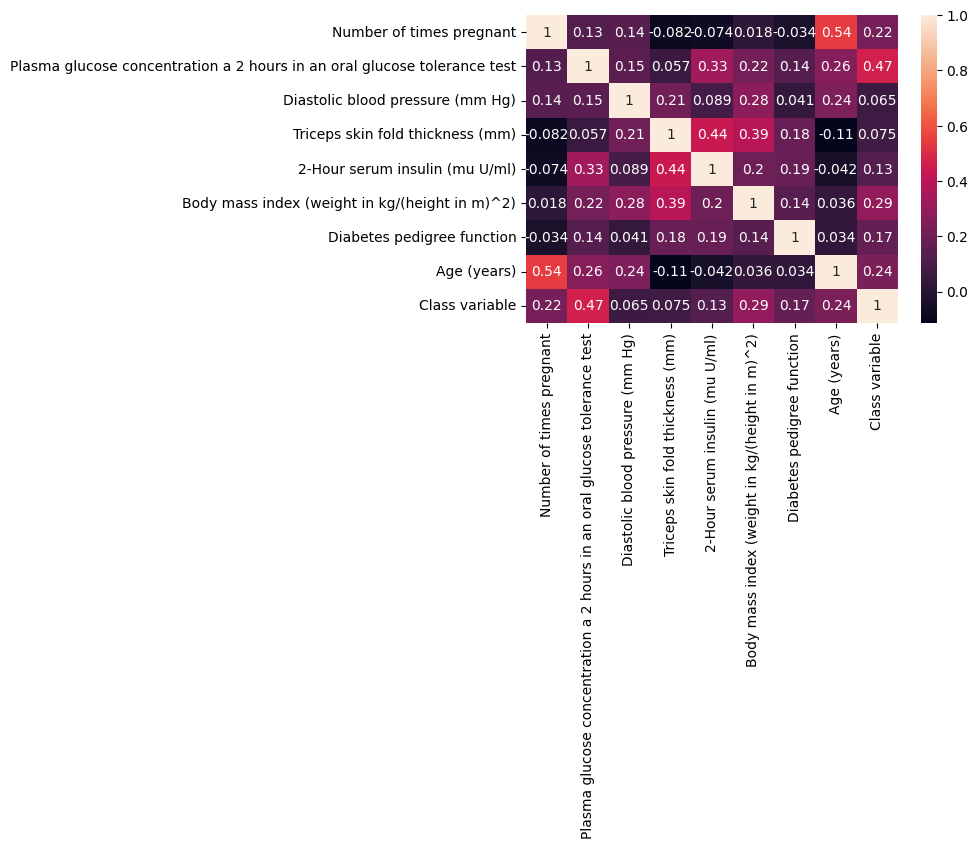

In [9]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(6,4))
ax = sns.heatmap(corr, annot=True)

**Train/Validation/Test Split**

- Train: 60% of total data
- Validation: 20% of total data
- Test: 20% of total data
- Stratified: keeps class balance in each split.



In [10]:
# Split into Train, Validation, and Test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42, stratify=y_train_val)

print(f"Training set size: {X_train.shape[0]}")
print(f"Validation set size: {X_val.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Training set size: 460
Validation set size: 154
Test set size: 154


**Define Evaluation Function**

In [11]:
# Define evaluation function (run once)
def evaluate_model(model, X_val, y_val, model_name, results_list):
    y_pred = model.predict(X_val)

    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)

    # Append to results
    results_list.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    })

    # Print results
    print(f"=== {model_name} ===")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    print("\nConfusion Matrix:")
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{model_name} - Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    print("-" * 60)

**Define K-Fold and Random Search Settings**

In [12]:
# Define CV strategy and results storage
kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []  # To store performance metrics
best_models = {}  # To store best fitted models

**SVM (Multiple Kernels)**

SVM: Tuning with Random Search...
=== SVM ===
Accuracy: 0.7987
Precision: 0.7556
Recall: 0.6296
F1-Score: 0.6869

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       100
           1       0.76      0.63      0.69        54

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154


Confusion Matrix:


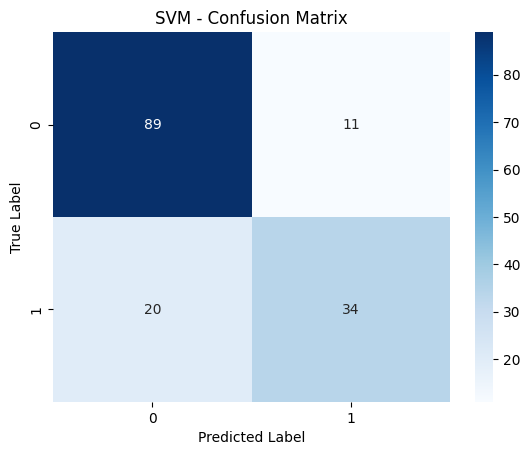

------------------------------------------------------------


In [13]:
# SVM - Hyperparameter Tuning & Training
print("SVM: Tuning with Random Search...")

param_dist_svm = {
    'C': np.logspace(-3, 3, 100),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-4, 1, 50))
}

svm = SVC(random_state=42)

random_search_svm = RandomizedSearchCV(
    estimator=svm,
    param_distributions=param_dist_svm,
    n_iter=10,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_svm.fit(X_train, y_train)

best_svm = random_search_svm.best_estimator_
best_models['SVM'] = best_svm

evaluate_model(best_svm, X_val, y_val, "SVM", results)

**Decision Tree**

Decision Tree: Tuning with Random Search...
=== Decision Tree ===
Accuracy: 0.7013
Precision: 0.5909
Recall: 0.4815
F1-Score: 0.5306

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.59      0.48      0.53        54

    accuracy                           0.70       154
   macro avg       0.67      0.65      0.66       154
weighted avg       0.69      0.70      0.69       154


Confusion Matrix:


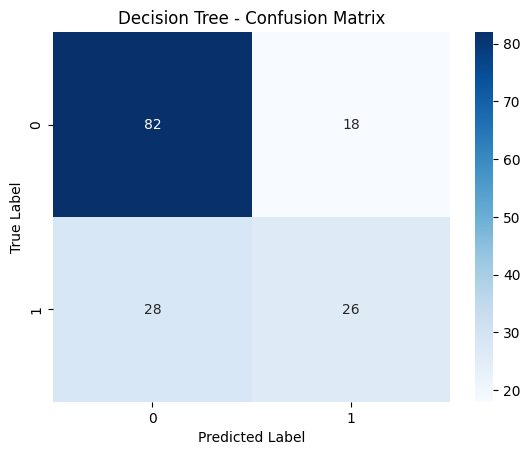

------------------------------------------------------------


In [14]:
# Decision Tree - Hyperparameter Tuning & Training
print("Decision Tree: Tuning with Random Search...")

param_dist_dt = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
    'criterion': ['gini', 'entropy']
}

dt = DecisionTreeClassifier(random_state=42)

random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_dist_dt,
    n_iter=50,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_dt.fit(X_train, y_train)

best_dt = random_search_dt.best_estimator_
best_models['DecisionTree'] = best_dt

evaluate_model(best_dt, X_val, y_val, "Decision Tree", results)

**Random Forest**

Random Forest: Tuning with Random Search...
=== Random Forest ===
Accuracy: 0.7792
Precision: 0.7083
Recall: 0.6296
F1-Score: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       100
           1       0.71      0.63      0.67        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.78      0.78      0.78       154


Confusion Matrix:


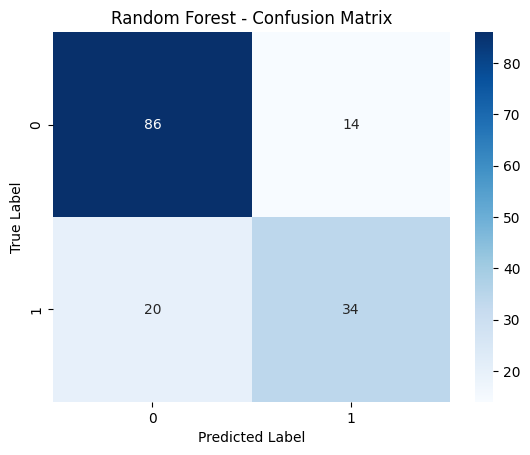

------------------------------------------------------------


In [15]:
# Random Forest - Hyperparameter Tuning & Training
print("Random Forest: Tuning with Random Search...")

param_dist_rf = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': np.arange(2, 20),
    'min_samples_leaf': np.arange(1, 10),
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state=42)

random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist_rf,
    n_iter=50,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_rf.fit(X_train, y_train)

best_rf = random_search_rf.best_estimator_
best_models['RandomForest'] = best_rf

evaluate_model(best_rf, X_val, y_val, "Random Forest", results)

**XGBoost**

XGBoost: Tuning with Random Search...
=== XGBoost ===
Accuracy: 0.7662
Precision: 0.6957
Recall: 0.5926
F1-Score: 0.6400

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154


Confusion Matrix:


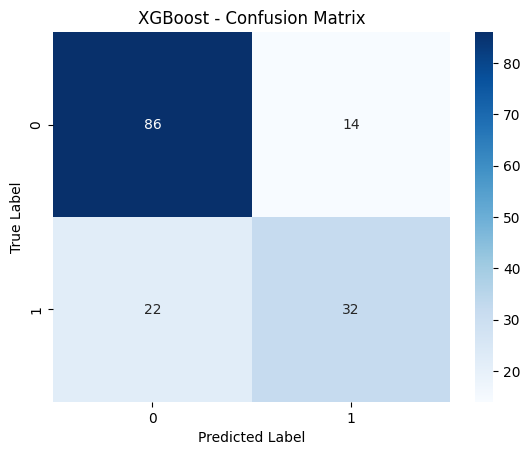

------------------------------------------------------------


In [16]:
# XGBoost - Hyperparameter Tuning & Training
print("XGBoost: Tuning with Random Search...")

param_dist_xgb = {
    'n_estimators': np.arange(50, 300, 50),
    'max_depth': np.arange(3, 10),
    'learning_rate': np.logspace(-3, 0, 100),
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2, 0.5],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [0.1, 1, 10]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

random_search_xgb = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist_xgb,
    n_iter=50,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_xgb.fit(X_train, y_train)

best_xgb = random_search_xgb.best_estimator_
best_models['XGBoost'] = best_xgb

evaluate_model(best_xgb, X_val, y_val, "XGBoost", results)

**k-NN**

k-NN: Tuning with Random Search...
=== k-Nearest Neighbors ===
Accuracy: 0.7922
Precision: 0.7619
Recall: 0.5926
F1-Score: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.90      0.85       100
           1       0.76      0.59      0.67        54

    accuracy                           0.79       154
   macro avg       0.78      0.75      0.76       154
weighted avg       0.79      0.79      0.79       154


Confusion Matrix:


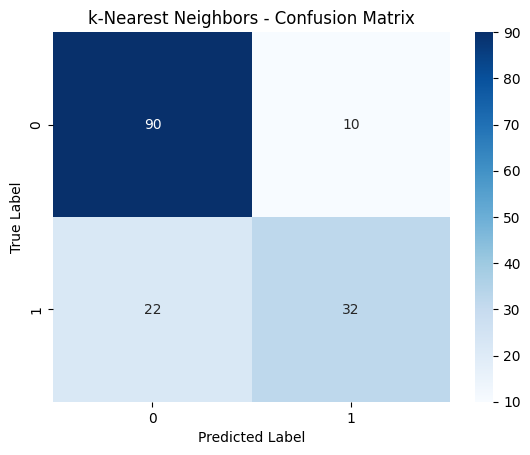

------------------------------------------------------------


In [17]:
# k-NN - Hyperparameter Tuning & Training
print("k-NN: Tuning with Random Search...")

param_dist_knn = {
    'n_neighbors': np.arange(1, 30),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsClassifier()

random_search_knn = RandomizedSearchCV(
    estimator=knn,
    param_distributions=param_dist_knn,
    n_iter=30,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_knn.fit(X_train, y_train)

best_knn = random_search_knn.best_estimator_
best_models['KNN'] = best_knn

evaluate_model(best_knn, X_val, y_val, "k-Nearest Neighbors", results)

**Logistic Regression**

Logistic Regression: Tuning with Random Search...
=== Logistic Regression ===
Accuracy: 0.7857
Precision: 0.7333
Recall: 0.6111
F1-Score: 0.6667

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154


Confusion Matrix:


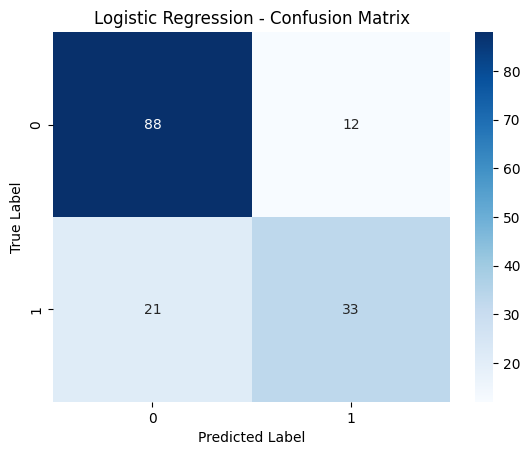

------------------------------------------------------------


In [18]:
# Logistic Regression - Hyperparameter Tuning & Training
print("Logistic Regression: Tuning with Random Search...")

param_dist_lr = {
    'C': np.logspace(-4, 4, 100),
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'solver': ['liblinear', 'saga'],
    'l1_ratio': np.linspace(0.1, 0.9, 9)
}

# Filter invalid combinations
lr = LogisticRegression(max_iter=1000, random_state=42, n_jobs=-1)

random_search_lr = RandomizedSearchCV(
    estimator=lr,
    param_distributions={
        k: v for k, v in param_dist_lr.items() if k != 'l1_ratio' or 'elasticnet' in param_dist_lr['penalty']
    },
    n_iter=30,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42
)

random_search_lr.fit(X_train, y_train)

best_lr = random_search_lr.best_estimator_
best_models['LogisticRegression'] = best_lr

evaluate_model(best_lr, X_val, y_val, "Logistic Regression", results)

🏆 Model Comparison Summary
                 Model  Accuracy  Precision  Recall  F1-Score
0                  SVM    0.7987     0.7556  0.6296    0.6869
4  k-Nearest Neighbors    0.7922     0.7619  0.5926    0.6667
5  Logistic Regression    0.7857     0.7333  0.6111    0.6667
2        Random Forest    0.7792     0.7083  0.6296    0.6667
3              XGBoost    0.7662     0.6957  0.5926    0.6400
1        Decision Tree    0.7013     0.5909  0.4815    0.5306


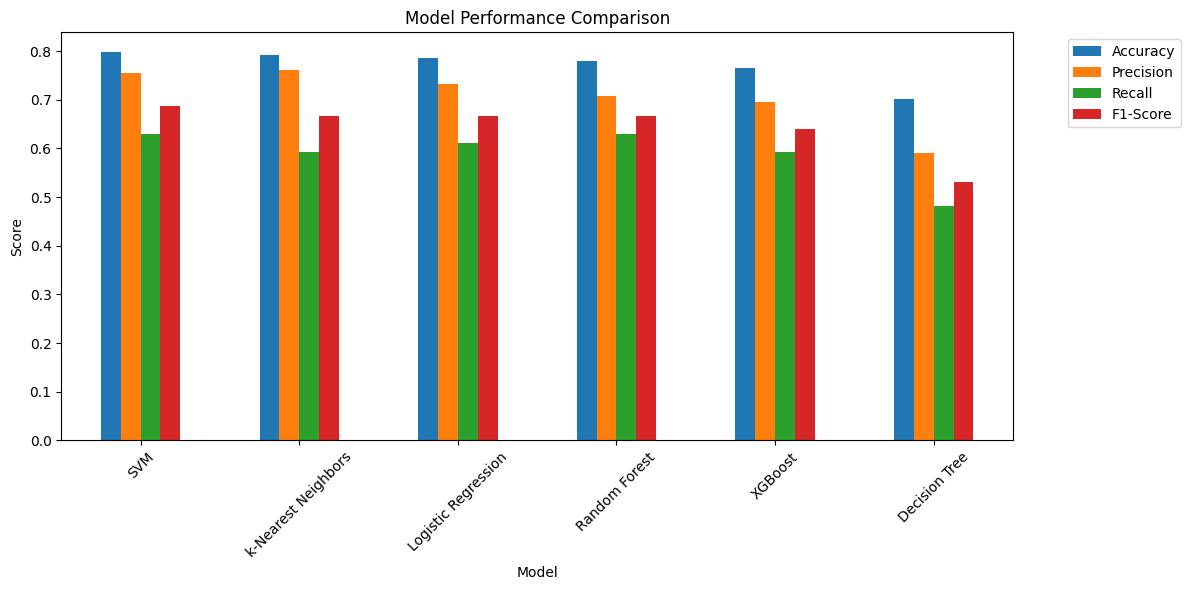

In [19]:
# Results Summary Table
results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
print("🏆 Model Comparison Summary")
print(results_df.round(4))

# Optional: Plot comparison
results_df.set_index('Model')[['Accuracy', 'Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

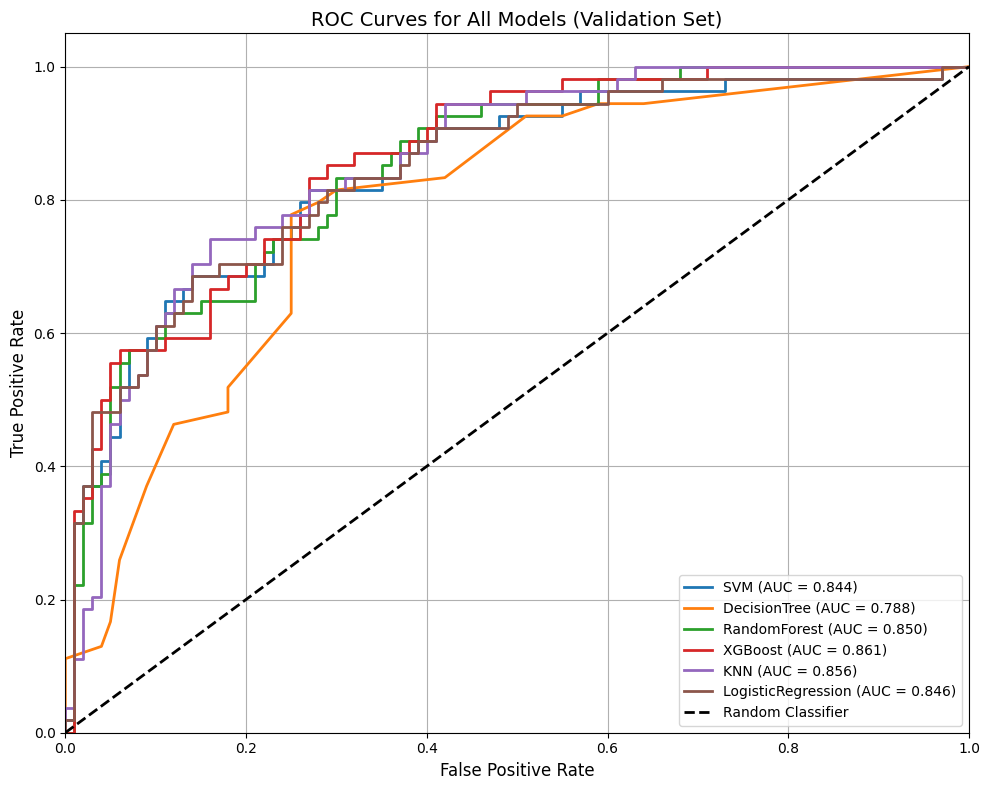

📊 AUC Scores on Validation Set:
                       AUC
XGBoost             0.8606
KNN                 0.8556
RandomForest        0.8498
LogisticRegression  0.8457
SVM                 0.8437
DecisionTree        0.7883


In [20]:
# Plot ROC Curves for All Models
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))

# Dictionary to store AUC scores for display
auc_scores = {}

for name, model in best_models.items():
    # Get predicted probabilities for positive class
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_val)[:, 1]
    elif hasattr(model, "decision_function"):
        # For models like SVM that don't have predict_proba by default
        y_pred_proba = model.decision_function(X_val)
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())  # Normalize to [0,1] for plotting
    else:
        continue  # Skip if no probability output

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    auc_scores[name] = roc_auc

    # Plot ROC curve
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')

# Plot diagonal (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves for All Models (Validation Set)', fontsize=14)
plt.legend(loc="lower right", fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Print AUC scores in a table
print("📊 AUC Scores on Validation Set:")
auc_df = pd.DataFrame.from_dict(auc_scores, orient='index', columns=['AUC']).sort_values(by='AUC', ascending=False)
print(auc_df.round(4))

Evaluating best models on the Test Set:
=== SVM (Test) ===
Accuracy: 0.7403
Precision: 0.6750
Recall: 0.5000
F1-Score: 0.5745

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       100
           1       0.68      0.50      0.57        54

    accuracy                           0.74       154
   macro avg       0.72      0.69      0.69       154
weighted avg       0.73      0.74      0.73       154


Confusion Matrix:


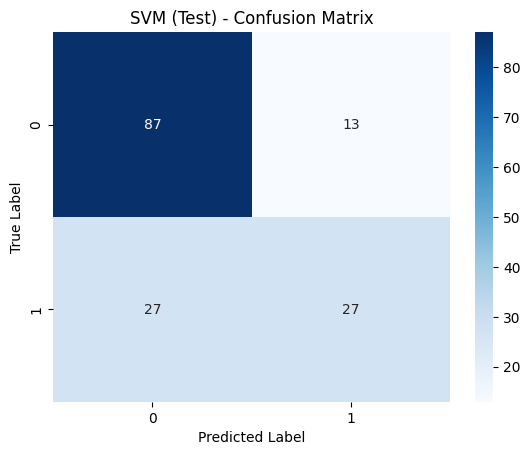

------------------------------------------------------------
=== DecisionTree (Test) ===
Accuracy: 0.7273
Precision: 0.6429
Recall: 0.5000
F1-Score: 0.5625

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       100
           1       0.64      0.50      0.56        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.68       154
weighted avg       0.72      0.73      0.72       154


Confusion Matrix:


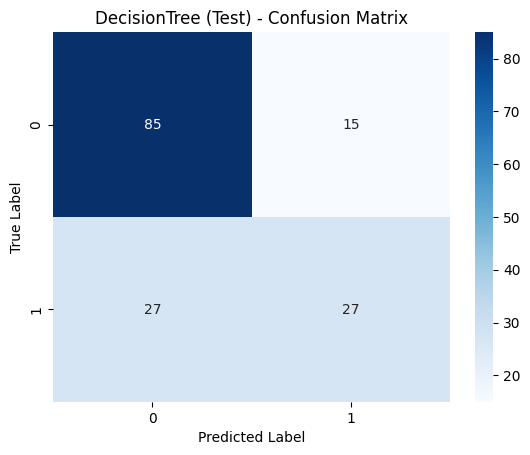

------------------------------------------------------------
=== RandomForest (Test) ===
Accuracy: 0.7532
Precision: 0.6739
Recall: 0.5741
F1-Score: 0.6200

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:


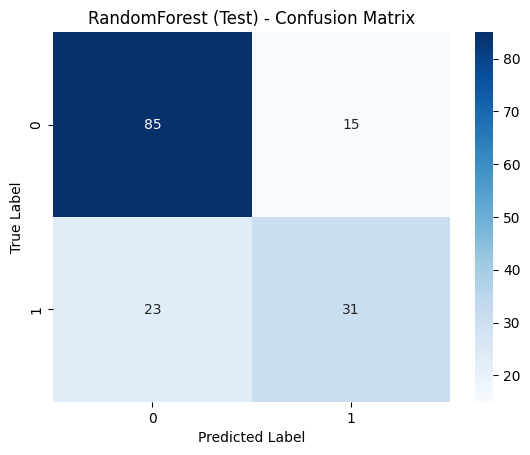

------------------------------------------------------------
=== XGBoost (Test) ===
Accuracy: 0.7532
Precision: 0.6739
Recall: 0.5741
F1-Score: 0.6200

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       100
           1       0.67      0.57      0.62        54

    accuracy                           0.75       154
   macro avg       0.73      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:


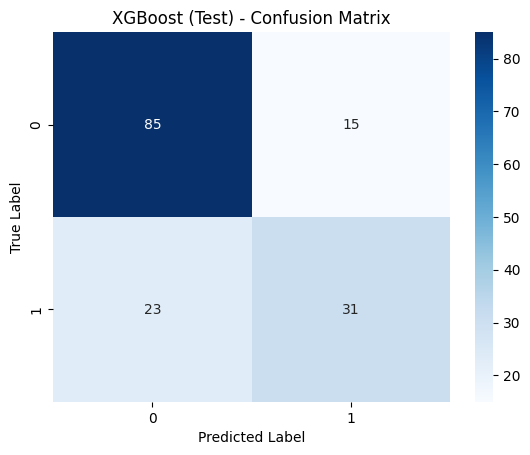

------------------------------------------------------------
=== KNN (Test) ===
Accuracy: 0.7143
Precision: 0.6190
Recall: 0.4815
F1-Score: 0.5417

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.84      0.79       100
           1       0.62      0.48      0.54        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Confusion Matrix:


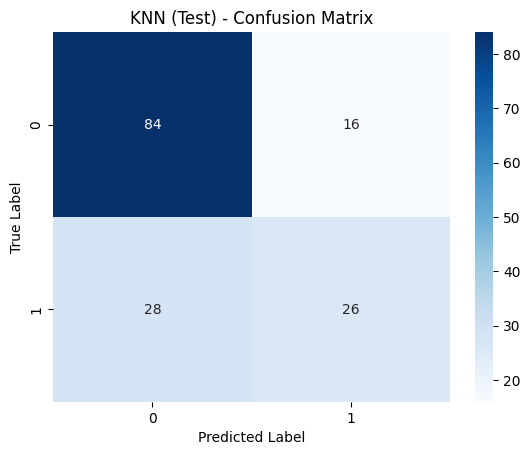

------------------------------------------------------------
=== LogisticRegression (Test) ===
Accuracy: 0.7273
Precision: 0.6364
Recall: 0.5185
F1-Score: 0.5714

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       100
           1       0.64      0.52      0.57        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154


Confusion Matrix:


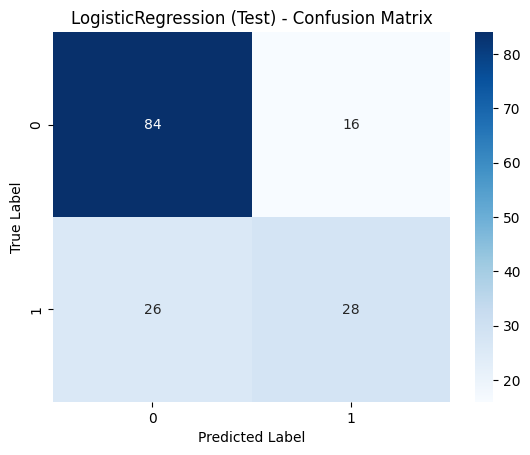

------------------------------------------------------------

🏆 Model Performance Summary on Test Set
                       Model  Accuracy  Precision  Recall  F1-Score
3             XGBoost (Test)    0.7532     0.6739  0.5741    0.6200
2        RandomForest (Test)    0.7532     0.6739  0.5741    0.6200
0                 SVM (Test)    0.7403     0.6750  0.5000    0.5745
1        DecisionTree (Test)    0.7273     0.6429  0.5000    0.5625
5  LogisticRegression (Test)    0.7273     0.6364  0.5185    0.5714
4                 KNN (Test)    0.7143     0.6190  0.4815    0.5417


In [21]:
# Evaluate the best models on the test set
print("Evaluating best models on the Test Set:")
test_results = []  # To store test performance metrics

for name, model in best_models.items():
    evaluate_model(model, X_test, y_test, name + " (Test)", test_results)

# Display test results summary
test_results_df = pd.DataFrame(test_results).sort_values(by='Accuracy', ascending=False)
print("\n🏆 Model Performance Summary on Test Set")
print(test_results_df.round(4))

In [22]:
# Identify the best model based on test accuracy
best_model_name = test_results_df.iloc[0]['Model'].replace(" (Test)", "")
best_model = best_models[best_model_name]

# Save the best model
model_filename = f"best_model_{best_model_name}.pkl"
joblib.dump(best_model, model_filename)

print(f"✅ Best Model: {best_model_name}")
print(f"Validation Accuracy: {results_df[results_df['Model'] == best_model_name]['Accuracy'].iloc[0]:.4f}")
print(f"Model saved as: {model_filename}")

✅ Best Model: XGBoost
Validation Accuracy: 0.7662
Model saved as: best_model_XGBoost.pkl
